**This notebook is an exercise in the [Introduction to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/dansbecker/model-validation).**

---


## Recap
You've built a model. In this exercise you will test how good your model is.

Run the cell below to set up your coding environment where the previous exercise left off.

In [1]:
# Code you have previously used to load data
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Path of the file to read
iowa_file_path = '../input/home-data-for-ml-course/train.csv'

home_data = pd.read_csv(iowa_file_path)
y = home_data.SalePrice
feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[feature_columns]

# Specify Model
iowa_model = DecisionTreeRegressor()
# Fit Model
iowa_model.fit(X, y)

print("First in-sample predictions:", iowa_model.predict(X.head()))
print("Actual target values for those homes:", y.head().tolist())

# Set up code checking
#from learntools.core import binder
#binder.bind(globals())
#from learntools.machine_learning.ex4 import *
#print("Setup Complete")

First in-sample predictions: [208500. 181500. 223500. 140000. 250000.]
Actual target values for those homes: [208500, 181500, 223500, 140000, 250000]


# Exercises

## Step 1: Split Your Data
Use the `train_test_split` function to split up your data.

Give it the argument `random_state=1` so the `check` functions know what to expect when verifying your code.

Recall, your features are loaded in the DataFrame **X** and your target is loaded in **y**.


In [2]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split

# fill in and uncomment
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

# Check your answer
#step_1.check()

In [3]:
# The lines below will show you a hint or the solution.
# step_1.hint() 
# step_1.solution()


## Step 2: Specify and Fit the Model

Create a `DecisionTreeRegressor` model and fit it to the relevant data.
Set `random_state` to 1 again when creating the model.

In [4]:
# You imported DecisionTreeRegressor in your last exercise
# and that code has been copied to the setup code above. So, no need to
# import it again

# Specify the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit iowa_model with the training data.
iowa_model.fit(train_X, train_y)

# Check your answer
#step_2.check()

DecisionTreeRegressor(random_state=1)

In [5]:
# step_2.hint()
# step_2.solution()

## Step 3: Make Predictions with Validation data


In [6]:
# Predict with all validation observations
val_predictions = iowa_model.predict(val_X)

# Check your answer
#step_3.check()

In [7]:
# step_3.hint()
# step_3.solution()

Inspect your predictions and actual values from validation data.

In [8]:
# print the top few validation predictions
print(val_predictions[0:5])
# print the top few actual prices from validation data
print(val_y.head().values)

[186500. 184000. 130000.  92000. 164500.]
[231500 179500 122000  84500 142000]


What do you notice that is different from what you saw with in-sample predictions (which are printed after the top code cell in this page).

Do you remember why validation predictions differ from in-sample (or training) predictions? This is an important idea from the last lesson.

## Step 4: Calculate the Mean Absolute Error in Validation Data


In [9]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

# uncomment following line to see the validation_mae
print(val_mae)

# Check your answer
#step_4.check()

29652.931506849316


In [10]:
# step_4.hint()
# step_4.solution()

Is that MAE good?  There isn't a general rule for what values are good that applies across applications. But you'll see how to use (and improve) this number in the next step.

# Keep Going

You are ready for **[Underfitting and Overfitting](https://www.kaggle.com/dansbecker/underfitting-and-overfitting).**


---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-machine-learning/discussion) to chat with other learners.*

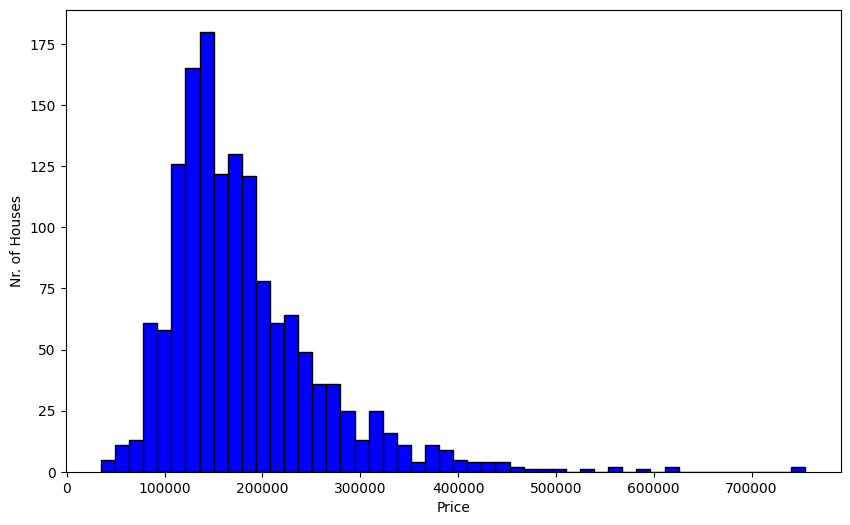

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.hist(y, bins=50, edgecolor='black', color='blue')
plt.xlabel('Price')
plt.ylabel('Nr. of Houses')
plt.show()

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   1stFlrSF      1460 non-null   int64
 3   2ndFlrSF      1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


In [13]:
X.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,1162.626712,346.992466,1.565068,2.866438,6.517808
std,9981.264932,30.202904,386.587738,436.528436,0.550916,0.815778,1.625393
min,1300.000000,1872.000000,334.000000,0.000000,0.000000,0.000000,2.000000
25%,7553.500000,1954.000000,882.000000,0.000000,1.000000,2.000000,5.000000
50%,9478.500000,1973.000000,1087.000000,0.000000,2.000000,3.000000,6.000000
75%,11601.500000,2000.000000,1391.250000,728.000000,2.000000,3.000000,7.000000
max,215245.000000,2010.000000,4692.000000,2065.000000,3.000000,8.000000,14.000000


In [14]:
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [27]:
data = pd.concat([y, X], axis=1)

In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1460 non-null   int64
 1   LotArea       1460 non-null   int64
 2   YearBuilt     1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
dtypes: int64(8)
memory usage: 91.4 KB


In [29]:
data.corr()

,SalePrice,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
SalePrice,1.000000,0.263843,0.522897,0.605852,0.319334,0.560664,0.168213,0.533723
LotArea,0.263843,1.000000,0.014228,0.299475,0.050986,0.126031,0.119690,0.190015
YearBuilt,0.522897,0.014228,1.000000,0.281986,0.010308,0.468271,-0.070651,0.095589
1stFlrSF,0.605852,0.299475,0.281986,1.000000,-0.202646,0.380637,0.127401,0.409516
2ndFlrSF,0.319334,0.050986,0.010308,-0.202646,1.000000,0.421378,0.502901,0.616423
FullBath,0.560664,0.126031,0.468271,0.380637,0.421378,1.000000,0.363252,0.554784
BedroomAbvGr,0.168213,0.119690,-0.070651,0.127401,0.502901,0.363252,1.000000,0.676620
TotRmsAbvGrd,0.533723,0.190015,0.095589,0.409516,0.616423,0.554784,0.676620,1.000000


In [40]:
y.skew()

np.float64(1.8828757597682129)

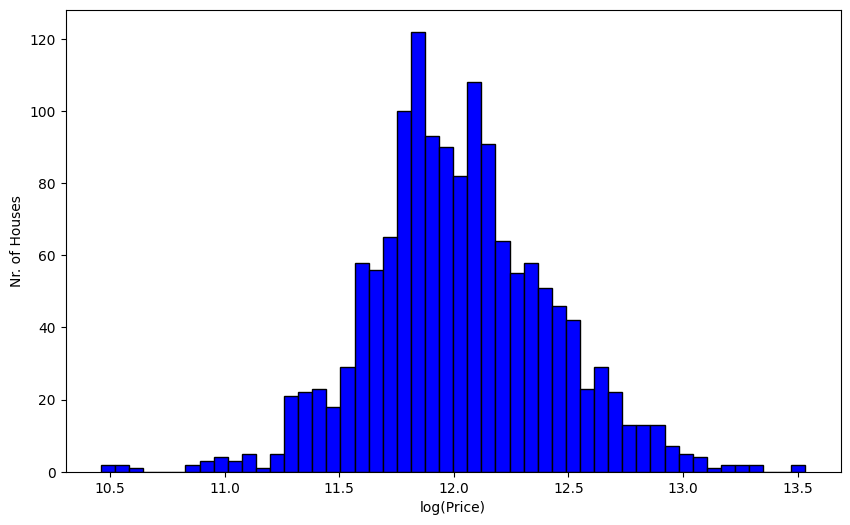

In [44]:
import numpy as np
y_log = np.log(y)
y_log.skew()

plt.figure(figsize=(10,6))
plt.hist(y_log, bins=50, edgecolor='black', color='blue')
plt.xlabel('log(Price)')
plt.ylabel('Nr. of Houses')
plt.show()